In [18]:
import time
from scipy import stats

user_product_dic = {}
product_user_dic = {}

product_id_name_dic = {}

for line in open('online_retail_utf.txt'):
    line_items = line.strip().split('\t')
    user_code = line_items[6]
    product_id = line_items[1]
    product_name = line_items[2]

    if len(user_code) == 0:
        continue

    try:
        invoice_year = time.strptime(line_items[4], '%Y-%m-%d %H:%M').tm_year
    except ValueError:
        continue

    if invoice_year != 2011:
        continue

    user_product_dic.setdefault(user_code, set())
    user_product_dic[user_code].add(product_id)

    product_user_dic.setdefault(product_id, set())
    product_user_dic[product_id].add(user_code)

    product_id_name_dic[product_id] = product_name

product_per_user_li = [len(x) for x in user_product_dic.values()]

print('# of users: ', len(user_product_dic))
print('# of products: ', len(product_user_dic))

print(stats.describe(product_per_user_li))


# of users:  4244
# of products:  3612
DescribeResult(nobs=4244, minmax=(1, 1754), mean=59.561027332704995, variance=6836.799715748488, skewness=6.8634414240571555, kurtosis=96.64374909092719)


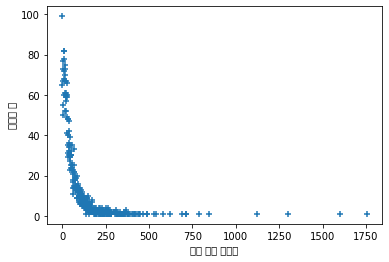

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

plot_data_all = Counter(product_per_user_li)
plot_data_x = list(plot_data_all.keys())
plot_data_y = list(plot_data_all.values())
plt.xlabel('고유 상품 가짓수')
plt.ylabel('사용자 수')
plt.scatter(plot_data_x, plot_data_y, marker='+')

plt.show()

In [20]:
min_product_user_li = [k for k, v in user_product_dic.items() if len(v) == 1]
max_product_user_li = [k for k, v in user_product_dic.items() if len(v) >= 600]

print('# of users purchased one product: %d' %(len(min_product_user_li)))
print('# of users purchased more than 600 product: %d' %(len(max_product_user_li)))

user_product_dic = {k:v for k, v in user_product_dic.items() if len(v) > 1 and len(v) < 600}
print('# of left user: %d' %(len(user_product_dic)))

id_product_dic = {}

for product_set_li in user_product_dic.values():
    for x in product_set_li:
        if x in id_product_dic:
            product_id = id_product_dic[x]
        else:
            id_product_dic.setdefault(x, len(id_product_dic))

print('# of left items: %d' % (len(id_product_dic)))


# of users purchased one product: 99
# of users purchased more than 600 product: 10
# of left user: 4135
# of left items: 3577


In [21]:
print(user_product_dic)

6', '22628', '21212', '21210', '21989', '21988', '22734'}, '12660': {'22320', '22744', '22555', '84931B', '22453', '84375', '22492', '22966', '22554', '22175', '22556', '22654', 'POST'}, '15540': {'90030B', '21116', '23076', '21934', '90030A', '84875B', '23434', '22821', '22110', '22944', '21935', '23493', '21494', '79144B', '22138'}, '17379': {'22608', '75011', '22197', '21731', '20719', '23309', '84378', '23343', '35967', '23583', '22633', '23493', '21380', '22333', '22577', '22867', '20832', '23005', '22151', '84536A', '23344', '22066', '16216', '84380', '22909', '22110', '84988', '22598', '20723', '22998', '21430', '21231', '23323', '16045', '22662', '21034', '22908', '85194S', '23103', '21810', '23581', '22865', '20712', '23439', '84510A', '21264', '22995', '85184C', '20996', '20724', '21429', '23313', '22356', '23206', '22131', '22187', '15034', '23310', '21928', '22161', '22834', '22338', '21212', '22079', '47590B', '22866', '22999', '21210', '22306', '84596F', '21154'}, '16800'